$$\textbf{Exponential population growth }$$

$$\frac{dN}{dt} = kN$$

$$\text{Scale units} =  \sqrt{u^2 +v^2}$$
$$dN = k N dt $$
$$\text{Change in time can be any number}$$
$$\text{Angles is just if} x* y = \text{positive} \text{ point upward} $$

$$\text{With actual solutions}$$
$$\text{For:... t it's better to take decimal so that the curve is drawn well not like a normal line}$$
$$ N(t) = N_O e^{kt}$$

The  T on each grid:

 [[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


The  N on each grid:

 [[ 0  0  0  0  0  0  0  0  0  0]
 [10 10 10 10 10 10 10 10 10 10]
 [20 20 20 20 20 20 20 20 20 20]
 [30 30 30 30 30 30 30 30 30 30]
 [40 40 40 40 40 40 40 40 40 40]
 [50 50 50 50 50 50 50 50 50 50]
 [60 60 60 60 60 60 60 60 60 60]
 [70 70 70 70 70 70 70 70 70 70]
 [80 80 80 80 80 80 80 80 80 80]
 [90 90 90 90 90 90 90 90 90 90]]


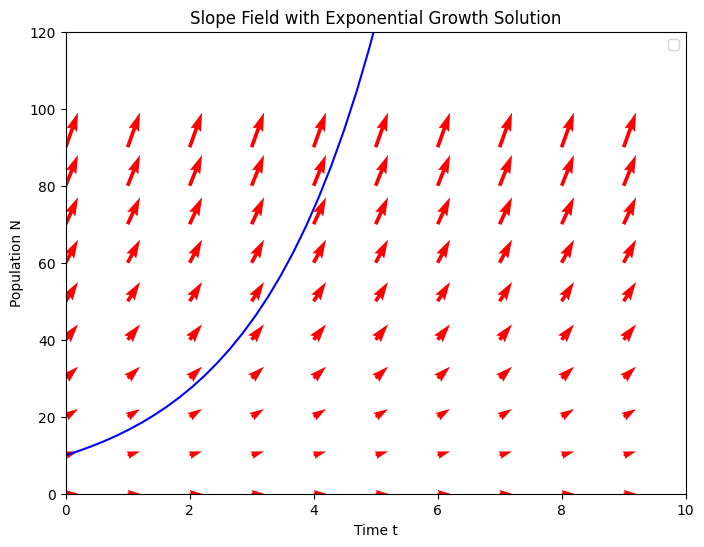

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

k= 0.5
N_O= 10

t=np.arange(0,10)
N = np.arange(0, 100, 10)


""" To make a grid """
T, N_grid = np.meshgrid(t,N)


print("The  T on each grid:\n\n" , T)

print("\n\nThe  N on each grid:\n\n" , N_grid)


"""For every N on grid i compute the slope"""
dN = k * N_grid
dt = np.ones_like(dN)

plt.figure(figsize=(8,6))

plt.quiver(T, N_grid, dt, dN, angles='xy', scale_units='xy', scale=5, color='red')


""" Function exact solution """

t=np.linspace(0,10)
N_t = N_O* np.exp(k*t)
plt.plot(t,N_t,color='Blue')
plt.xlim(0,10)
plt.ylim(0,120)

plt.xlabel("Time t")
plt.ylabel("Population N")
plt.title("Slope Field with Exponential Growth Solution")
plt.legend()
plt.show()





$$\textbf{Example to understand quiver}$$

$$\frac{dP}{dt} = 0.8P$$

![values of p and t](t_p_values.png)

(-3.5, 3.5)

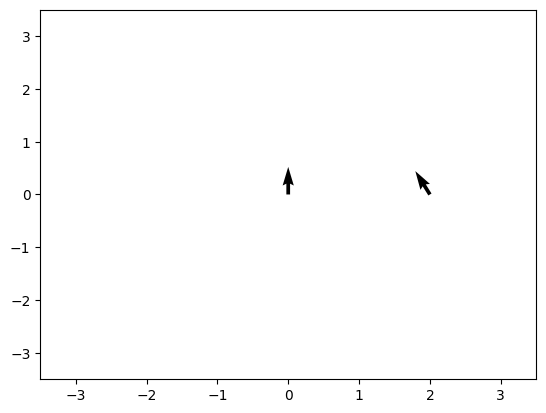

In [13]:
import matplotlib.pyplot as plt

"""First quive
(0,0) point where the arrow should go
0.5 is the normal slope bends depending on value 
if 0 it is horizontal

last (0,0.5 specify the direction)
"""
plt.quiver(0,0,0,0.5)
plt.quiver(2,0,-1,1.6) 
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)

$$\textbf{Logistic population growth}$$

$$\text{t\_span: steps from t =  0.0\,0.12\,0.31\, …\,15.0 }$$
$$\text{t\_eval: where the solution is at that t}$$

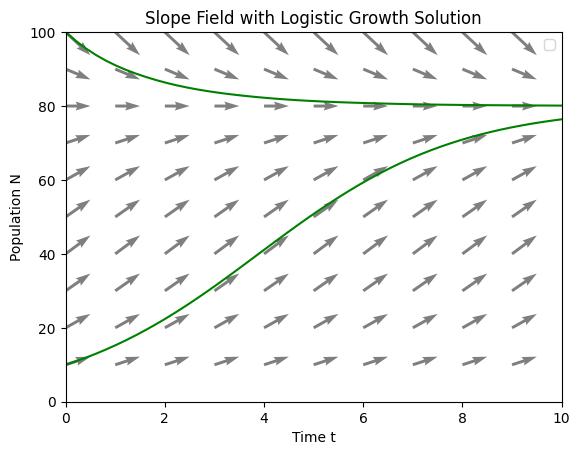

In [143]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def dN_dt(t,N,r,k):
    return r* N*(1 - (N/k))

r=0.5
k=80
N_0 = 10 

t_span=(0,15)
t_eval= np.linspace(0,10)
solution = solve_ivp(dN_dt,t_span, y0= [N_0],t_eval=t_eval, args=(r,k))
plt.plot(t_eval,solution.y[0],color='green')



"""
Initial population greater than k
"""
N_0_high = 100
solution_high = solve_ivp(dN_dt,t_span, y0=[N_0_high], t_eval=t_eval,args=(r,k))
plt.plot(t_eval,solution_high.y[0],color='green')


t= np.arange(0,10)
N= np.arange(10,110,10)

t, N_grid = np.meshgrid(t,N)
dN = r* N_grid*(1 - (N_grid/k))

dt = np.ones_like(dN)

plt.quiver(t,N_grid,dt,dN, angles="xy", scale_units="xy", scale = 2,color ="black", alpha = 0.5)



plt.xlim(0,10)
plt.ylim(0,100)

plt.xlabel("Time t")
plt.ylabel("Population N")
plt.title("Slope Field with Logistic Growth Solution")
plt.legend()


plt.show()



$$\textbf{ASSIGNMENT}$$

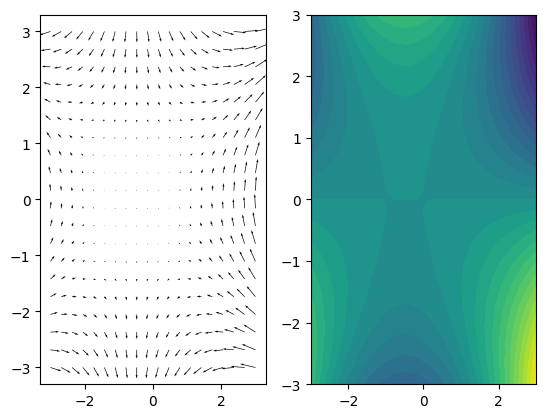

In [58]:
import numpy as np
import matplotlib.pyplot as plt

x1= np.linspace(-3,3,20)
x2 = np.linspace(-3,3,20)

x1_grid, x2_grid = np.meshgrid(x1,x2)

"""
print("The  x1 on each grid:\n\n" , x1_grid)

print("\n\nThe  x2 on each grid:\n\n" , x2_grid)
"""

""" Grid at each point """


dv_x1 = -x2_grid - 2*x1_grid*x2_grid
dv_x2 = -x1_grid - x1_grid**2 + x2_grid**2


dv_x1 = -dv_x1
dv_x2 = -dv_x2


"""
Since its two we don't need dt 

"""

"""
POTENTIAL FUNCTION

And contourf of pf
"""

def V(x1,x2):
    return -x1 * x2 - x1**2 * x2 + (x2**3) / 3

V_potential = V(x1_grid, x2_grid)


"""
SUBPLOTS
"""

plt.subplot(1,2,1)
plt.tile("Gradient system")
plt.quiver(x1_grid,x2_grid,dv_x1,dv_x2, angles="xy", scale_units ="xy")

plt.subplot(1,2,2)
plt.contourf(x1_grid, x2_grid, V_potential, levels =30,cmap='viridis' )

plt.show()








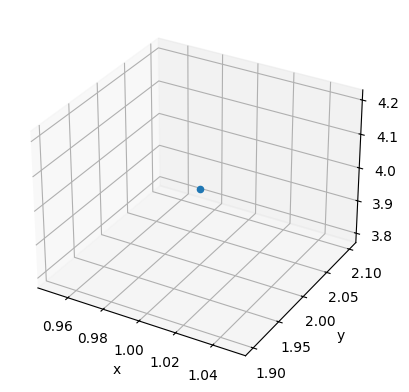

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax= plt.axes(projection ="3d")
ax.scatter(1,2,4)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

$$\textbf{3D Potential Function}$$

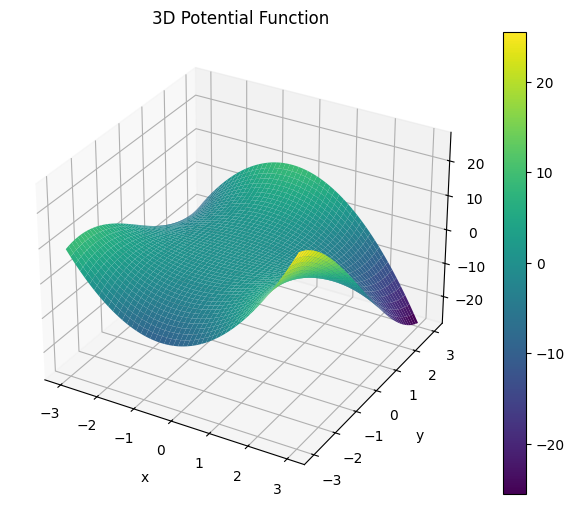

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


plt.figure(figsize=(8,6))
ax= plt.axes(projection ="3d")


d_plot = ax.plot_surface(x1_grid, x2_grid, V_potential, cmap='viridis')
plt.colorbar(d_plot)
ax.set_title("3D Potential Function")
ax.set_xlabel("x", labelpad = 8)
ax.set_ylabel("y", labelpad = 8)
ax.set_zlabel("z", labelpad =10)
plt.show()